In [1]:
import tensorflow as tf
print("NUM GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

2023-12-10 14:55:08.725614: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-12-10 14:55:08.989024: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI AVX512_BF16 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-10 14:55:09.670072: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


NUM GPUs Available:  1


2023-12-10 14:55:10.820082: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-12-10 14:55:10.997037: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-12-10 14:55:10.997189: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.


In [2]:
# data processing
# x_train is like past n days, y_train is future n days
# past n days will be 365 ? future n days is 7 ? for the week?
import pickle
import numpy as np
import pandas as pd
full_set = pd.DataFrame()
len_test = 0
start_year = 2017
end_year = 2022
for x in range(start_year, end_year+1):
    filepath = "data/aqi_by_county_data/" + str(x) + "-wozone.pkl"
    infile2 = open(filepath, 'rb')
    ozone_data = pickle.load(infile2)
    print(ozone_data.head())
    new_df = pd.DataFrame(ozone_data[['AQI', 'Ozone']])
    # full_set = full_set.append(new_df)
    full_set = pd.concat([full_set, new_df], axis=0, ignore_index=True)
    len_test = new_df.shape[0]
training_set = full_set.iloc[:-len_test, :]
test_set = full_set.iloc[-len_test:, :]


        Date     Ozone   AQI
0 2017-02-28  0.030000  43.0
1 2017-03-01  0.032510  37.0
2 2017-03-02  0.040834  40.0
3 2017-03-03  0.036880  37.0
4 2017-03-04  0.038213  41.0
        Date     Ozone   AQI
0 2018-02-28  0.022000  23.0
1 2018-03-01  0.021315  36.0
2 2018-03-02  0.042683  41.0
3 2018-03-03  0.043745  43.0
4 2018-03-04  0.043759  43.0
        Date     Ozone   AQI
0 2019-02-28  0.032000  23.0
1 2019-03-01  0.027258  35.0
2 2019-03-02  0.023276  25.0
3 2019-03-03  0.025159  27.0
4 2019-03-04  0.038699  40.0
        Date     Ozone   AQI
0 2020-02-29  0.035000  18.0
1 2020-03-01  0.038141  42.0
2 2020-03-02  0.042642  47.0
3 2020-03-03  0.038433  42.0
4 2020-03-04  0.041100  43.0
        Date     Ozone   AQI
0 2021-02-28  0.010500  26.0
1 2021-03-01  0.030817  37.0
2 2021-03-02  0.035831  39.0
3 2021-03-03  0.034355  42.0
4 2021-03-04  0.039069  42.0
        Date     Ozone   AQI
0 2022-02-28  0.033500  27.0
1 2022-03-01  0.037076  43.0
2 2022-03-02  0.039435  43.0
3 2022-03-03  

In [3]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)
testing_set_scaled = sc.fit_transform(test_set)

x_train = []
y_train = []
x_test = []
y_test = []
n_future = 4 # next 1 day of temperature forecast
n_past = 30 # Past 30 days
for i in range(0,len(training_set_scaled)-n_past-n_future+1):
    x_train.append(training_set_scaled[i : i + n_past])
    y_train.append(training_set_scaled[i + n_past : i + n_past + n_future, 0])

for i in range(0,len(testing_set_scaled)-n_past-n_future+1):
    x_test.append(testing_set_scaled[i : i + n_past])
    y_test.append(testing_set_scaled[i + n_past : i + n_past + n_future, 0])

x_train , y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0] , x_train.shape[1], 2) )
y_train = np.reshape(y_train, (y_train.shape[0], 4)  )

x_test , y_test = np.array(x_test), np.array(y_test)
x_test = np.reshape(x_test, (x_test.shape[0] , x_test.shape[1], 2) )
y_test = np.reshape(y_test, (y_test.shape[0], 4)  )

[[0.4        0.51685597]
 [0.33333333 0.56010389]
 [0.36666667 0.70350558]
 [0.33333333 0.63539688]
 [0.37777778 0.65834959]
 [0.36666667 0.6029254 ]
 [0.45555556 0.45616415]
 [0.5        0.69412464]
 [0.42222222 0.79738385]
 [0.46666667 0.76055355]
 [0.36666667 0.68403733]
 [0.06666667 0.74513402]
 [0.22222222 0.        ]
 [0.35555556 0.6503254 ]
 [0.33333333 0.64666434]
 [0.37777778 0.72182381]
 [0.41111111 0.75335203]
 [0.41111111 0.6474267 ]
 [0.35555556 0.58198412]
 [0.33333333 0.58416353]
 [0.33333333 0.53006164]
 [0.34444444 0.59723568]
 [0.4        0.73945291]
 [0.41111111 0.69283681]
 [0.45555556 0.77367739]
 [0.43333333 0.75861534]
 [0.53333333 0.56677564]
 [0.34444444 0.54509353]
 [0.41111111 0.60398496]
 [0.4        0.67299815]]
[0.31111111 0.27777778 0.3        0.41111111]


<Axes: >

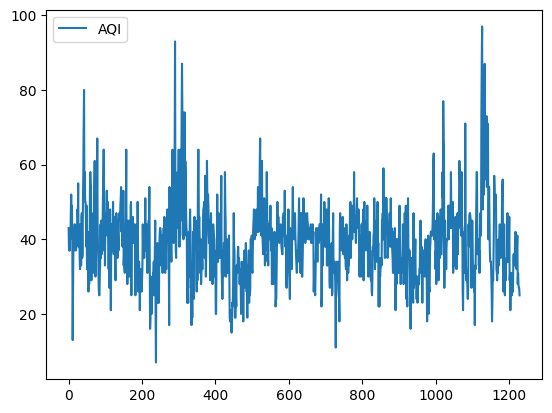

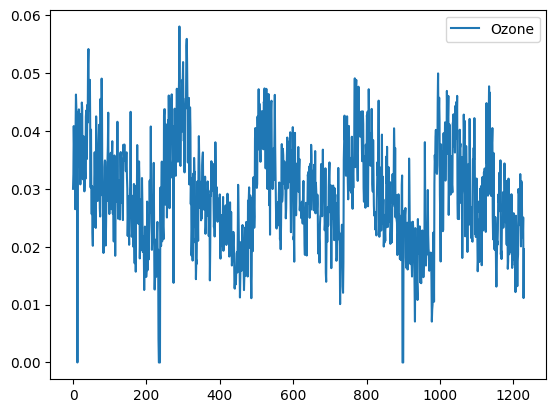

In [4]:
# data visualization
print(x_train[0])
print(y_train[0])
training_set.plot(y='AQI')
training_set.plot(y='Ozone')
# training_set

In [5]:
# data standardizing

In [6]:
# model: recurrent neural network

# x_train and y_train should be numpy arrays

# https://medium.com/analytics-vidhya/weather-forecasting-with-recurrent-neural-networks-1eaa057d70c3

from keras.models import Sequential
from keras.layers import Bidirectional, LSTM,Dense ,Dropout


In [7]:
# set up regressor model
regressor = Sequential()
regressor.add(Bidirectional(LSTM(units=30, return_sequences=True, input_shape = (x_train.shape[1],x_train.shape[2]) ) ))
#regressor.add(LSTM(units=30, return_sequences=True, input_shape = (x_train.shape[1],x_train.shape[2]) ) )
regressor.add(Dropout(0.2))
regressor.add(LSTM(units= 64 , return_sequences=True))
regressor.add(Dropout(0.4))
regressor.add(LSTM(units= 128 , return_sequences=True))
regressor.add(Dropout(0.3))
regressor.add(LSTM(units= 64 , return_sequences=True))
regressor.add(Dropout(0.3))
regressor.add(LSTM(units= 32))
regressor.add(Dropout(0.2))
regressor.add(Dense(units = n_future,activation='linear'))
# regressor.add(Dense(units = 1,activation='linear'))
regressor.compile(optimizer='adam', loss='mean_squared_error',metrics=['acc']) # adam optimizer for optimal efficiency
regressor.fit(x_train, y_train, epochs=750,batch_size=32 )
#history = regressor.fit(x_train, y_train, epochs=50, batch_size=32)
# plot history
#pyplot.plot(history.history['loss'], label='train')
#pyplot.plot(history.history['val_loss'], label='test')
#pyplot.legend()
#pyplot.show()


Epoch 1/750


2023-12-10 14:55:11.661565: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-12-10 14:55:11.661743: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-12-10 14:55:11.661896: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-12-10 14:55:11.907150: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-12-10 14:55:11.907338: I tensorflow/compile

38/38 [==============================] - 4s 13ms/step - loss: 0.0281 - acc: 0.2531
Epoch 2/750
38/38 [==============================] - 0s 12ms/step - loss: 0.0165 - acc: 0.2297
Epoch 3/750
38/38 [==============================] - 0s 13ms/step - loss: 0.0164 - acc: 0.2490
Epoch 4/750
38/38 [==============================] - 0s 13ms/step - loss: 0.0153 - acc: 0.2498
Epoch 5/750
38/38 [==============================] - 0s 12ms/step - loss: 0.0151 - acc: 0.2373
Epoch 6/750
38/38 [==============================] - 0s 12ms/step - loss: 0.0141 - acc: 0.2707
Epoch 7/750
38/38 [==============================] - 0s 13ms/step - loss: 0.0141 - acc: 0.2490
Epoch 8/750
38/38 [==============================] - 0s 12ms/step - loss: 0.0136 - acc: 0.2565
Epoch 9/750
38/38 [==============================] - 0s 13ms/step - loss: 0.0135 - acc: 0.2439
Epoch 10/750
38/38 [==============================] - 0s 12ms/step - loss: 0.0135 - acc: 0.2239
Epoch 11/750
38/38 [==============================] - 0s 12ms

In [8]:
# predict model
predicted_temperature = regressor.predict(x_test)
mse = np.mean(np.square(predicted_temperature - y_test))
print("Mean Squared Error: " + str(mse))

6/6 [==============================] - 1s 4ms/step
Mean Squared Error: 0.04177890145366662


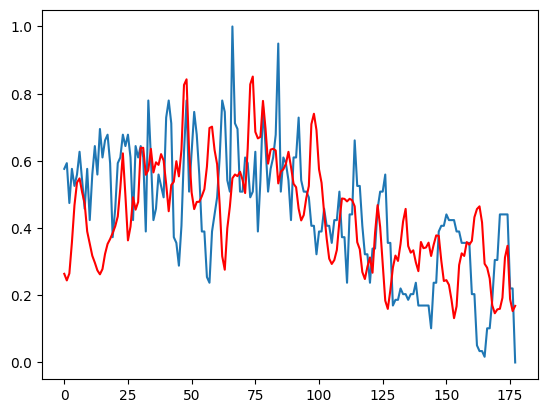

In [13]:
import matplotlib.pyplot as plt

plt.plot([x[0] for x in y_test])
plt.plot([y[0] for y in predicted_temperature], color="r")

# y_test